In [184]:
import pandas as pd
import nltk
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import operator
from PIL import Image
from wordcloud import WordCloud

In [6]:
df = pd.read_csv('amazon_alexa.tsv',
                 sep = '\t')
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [13]:
## Check data quality
df.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

# How do people like our products? 

In [57]:
## Avgrage ratings
df['rating'].describe()

count    3150.000000
mean        4.463175
std         1.068506
min         1.000000
25%         4.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: rating, dtype: float64

In [17]:
df.rating.unique()

array([5, 4, 3, 2, 1], dtype=int64)

In [25]:
rating_count = list(df.groupby('rating')['feedback'].count())

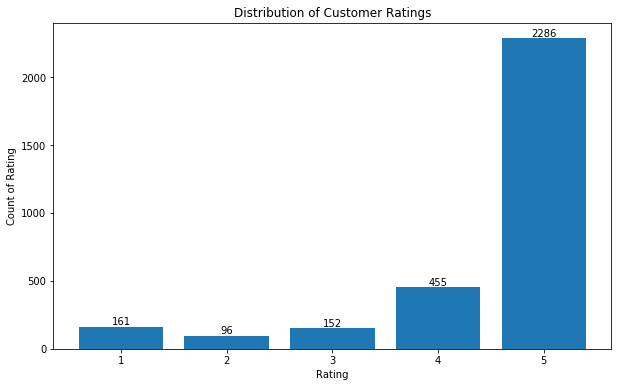

In [58]:
## Visulize the distribution of ratings
plt.rcParams["figure.figsize"] = (10,6)
plt.bar([1,2,3,4,5],rating_count)
plt.xticks([1,2,3,4,5])
plt.title("Distribution of Customer Ratings") # give the plot a title
plt.xlabel("Rating") # label the X axis
plt.ylabel("Count of Rating") # label the Y axis
for a,b in zip([1,2,3,4,5], rating_count):
    plt.text(a, b, str(b), horizontalalignment='center', verticalalignment='bottom')
plt.show()

Overall Alex has a good rating. The average rating is 4.46/5, and 2286 out of 3150 reviews(72.6%) are five star.

# Do people like all variations of our product equally?

In [66]:
var_rating = pd.DataFrame(df.groupby('variation')['rating'].mean()).sort_values(by = 'rating', ascending = False)

In [73]:
var_name = var_rating.index
var_mean_rating = round(var_rating.rating,2)

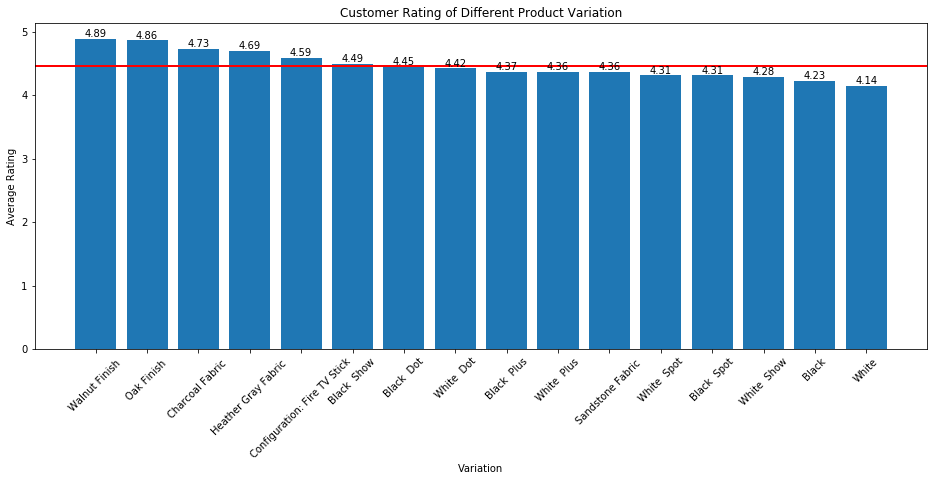

In [83]:
###### Visulize the rating of each product
plt.rcParams["figure.figsize"] = (16,6)
plt.bar(var_name,var_mean_rating)
plt.xticks(var_name, rotation = 45)
plt.axhline(df['rating'].mean(), color='red', linewidth=2)
plt.title("Customer Rating of Different Product Variation") 
plt.xlabel("Variation") 
plt.ylabel("Average Rating") 
for a,b in zip(var_name,var_mean_rating):
    plt.text(a, b, str(b), horizontalalignment='center', verticalalignment='bottom')
plt.show()

6 out of 16 variations performed better than average. The highest rating is 4.89, 9.64% higher than average rating 4.46. 10 out of 16 variations performed worst than average. The lowest rating is 4.14, 7.17% lower than average.  
However, the rating may need to be adjusted based on the number of each variation sold. 

In [84]:
temp = pd.DataFrame(df.groupby('variation')['feedback'].count()).sort_values(by = 'feedback',ascending = False)

In [85]:
var_type = temp.index
var_count = temp['feedback']

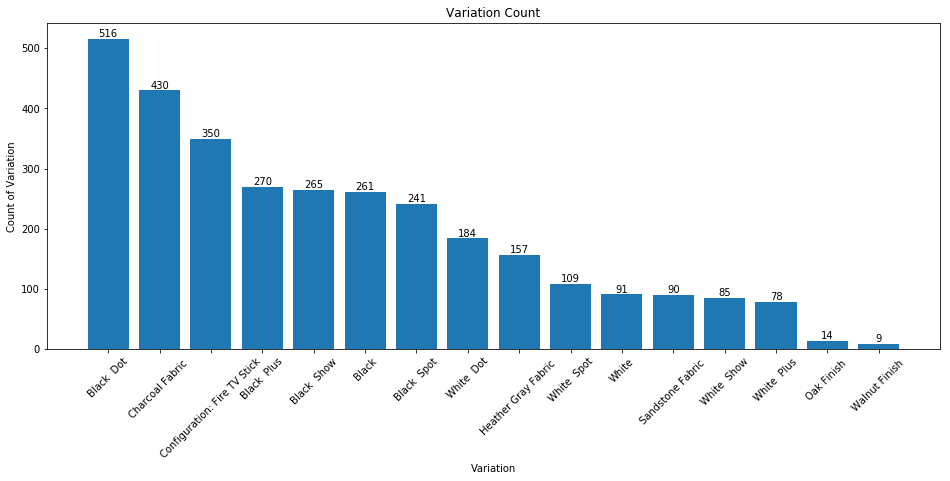

In [86]:
plt.rcParams["figure.figsize"] = (16,6)
plt.bar(var_type,var_count)
plt.xticks(var_type,rotation=45)
plt.title("Variation Count") # give the plot a title
plt.xlabel("Variation") # label the X axis
plt.ylabel("Count of Variation") # label the Y axis
for a,b in zip(var_type, var_count):
    plt.text(a, b, str(b), horizontalalignment='center', verticalalignment='bottom')
plt.show()

# What did people say in good and bad reviews? 

In [95]:
## Define "good reviews" as five star reviews
## "bad revies" as one star reviews
good_reviews = list(df[df['rating']==5]['verified_reviews'].apply(lambda x:x.lower()))
bad_reviews = list(df[df['rating']==1]['verified_reviews'])

In [111]:
##Count occurence of words in good reviews
good_words = Counter()
for good_review in good_reviews:
    lines = nltk.sent_tokenize(good_review)
    for line in lines:
        for word in line.split(' '):
            good_words[word]+=1   

In [196]:
sort_good_words = sorted(good_words.items(), key=operator.itemgetter(1), reverse = True)

In [197]:
sort_good_words

[('i', 1839),
 ('the', 1829),
 ('to', 1616),
 ('and', 1472),
 ('it', 1140),
 ('my', 979),
 ('love', 818),
 ('a', 807),
 ('for', 672),
 ('is', 661),
 ('with', 492),
 ('this', 479),
 ('have', 456),
 ('echo', 449),
 ('great', 429),
 ('of', 419),
 ('so', 395),
 ('in', 391),
 ('on', 358),
 ('can', 338),
 ('that', 327),
 ('we', 302),
 ('like', 297),
 ('alexa', 289),
 ('as', 288),
 ('but', 288),
 ('easy', 275),
 ('works', 273),
 ('music', 257),
 ('you', 251),
 ('was', 246),
 ('very', 240),
 ('all', 234),
 ('use', 231),
 ('set', 223),
 ('up', 219),
 ('it.', 207),
 ('just', 205),
 ('one', 194),
 ('not', 187),
 ('sound', 174),
 ('more', 166),
 ('our', 158),
 ('an', 156),
 ('she', 155),
 ('are', 155),
 ('when', 149),
 ('has', 141),
 ('!', 138),
 ('good', 134),
 ('what', 133),
 ('me', 131),
 ('get', 130),
 ('am', 130),
 ('be', 128),
 ('play', 127),
 ('or', 126),
 ('bought', 126),
 ('smart', 125),
 ('really', 124),
 ('had', 121),
 ("it's", 121),
 ('still', 119),
 ('it!', 118),
 ('from', 118),
 ('do

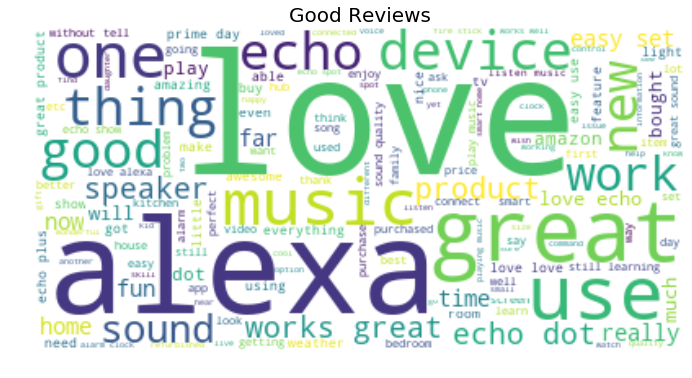

In [203]:
##Visualize good reviews using word cloud
np.random.seed(123)

good_review_text = ' '.join(good_reviews)

wordcloud = WordCloud(background_color="white").generate(good_review_text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Good Reviews',size=20)
plt.show()

In [199]:
##Count occurence of words in bad reviews
bad_words = Counter()
for bad_review in bad_reviews:
    lines = nltk.sent_tokenize(bad_review)
    for line in lines:
        for word in line.split(' '):
            bad_words[word]+=1   

In [200]:
sort_bad_words = sorted(bad_words.items(), key=operator.itemgetter(1), reverse = True)

In [201]:
sort_bad_words

[('the', 228),
 ('to', 193),
 ('I', 182),
 ('and', 150),
 ('it', 129),
 ('a', 120),
 ('is', 84),
 ('not', 71),
 ('of', 70),
 ('for', 60),
 ('this', 57),
 ('have', 56),
 ('my', 49),
 ('in', 45),
 ('on', 45),
 ('with', 45),
 ('that', 44),
 ('you', 42),
 ('but', 42),
 ('was', 37),
 ('The', 33),
 ('would', 31),
 ('so', 28),
 ('when', 27),
 ('be', 27),
 ('echo', 24),
 ('from', 24),
 ('will', 24),
 ('Amazon', 24),
 ('no', 23),
 ('up', 23),
 ('as', 23),
 ('It', 22),
 ('Echo', 21),
 ('one', 21),
 ('or', 21),
 ('get', 21),
 ('an', 20),
 ('i', 20),
 ('does', 19),
 ('it.', 19),
 ('am', 18),
 ('Alexa', 17),
 ('just', 17),
 ('they', 17),
 ('product', 17),
 ('me', 16),
 ('even', 16),
 ('can', 16),
 ('device', 16),
 ('after', 15),
 ('This', 15),
 ('only', 15),
 ('are', 15),
 ('like', 15),
 ('bought', 15),
 ('very', 15),
 ('all', 15),
 ('if', 15),
 ('works', 14),
 ('do', 14),
 ('work', 14),
 ('been', 14),
 ('has', 14),
 ('time', 14),
 ('off', 14),
 ('screen', 14),
 ('back', 13),
 ('had', 13),
 ('thing

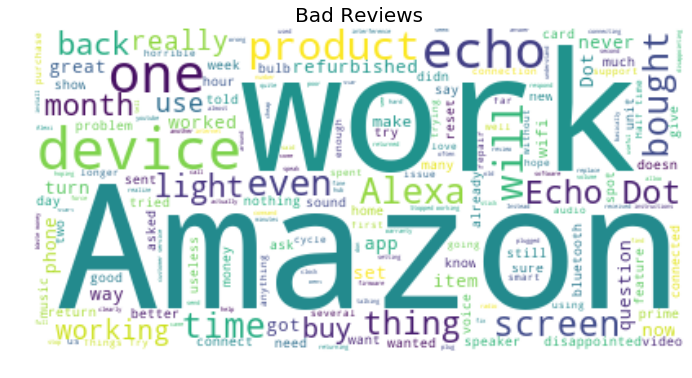

In [202]:
## Visualizing bad reviews using word cloud
np.random.seed(123)

bad_review_text = ' '.join(bad_reviews)

wordcloud = WordCloud(background_color="white").generate(bad_review_text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Bad Reviews',size=20)
plt.show()